In [10]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/Dataset/Dataset/Titanic-Dataset.csv")
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.drop(columns=[col for col in categorical_columns if col != 'Survived'])
missing_info = data.isnull().sum() / len(data) * 100
for column in data.columns:
  if missing_info[column] > 10:
    data[column].fillna(data[column].mean(), inplace=True)
else:
  data.dropna(subset=[column], inplace=True)
# Display cleaned data
print("Data after processing:\n", data.head())
print("\nMissing values after processing:\n", data.isnull().sum())

Data after processing:
    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

Missing values after processing:
 PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


/tmp/ipython-input-1412634960.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [11]:
import numpy as np

# Separate features (X) and target (y)
X = data.drop(columns=['Survived']).values  # Convert features to NumPy array
y = data['Survived'].values                 # Convert target to NumPy array

# Define a function for train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """
    Splits dataset into train and test sets.

    Arguments:
    X : np.ndarray
        Feature matrix.
    y : np.ndarray
        Target array.
    test_size : float
        Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
        Seed for reproducibility.

    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
        Training and testing splits of features and target.
    """

    np.random.seed(random_seed)

    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle the indices

    test_split_size = int(len(X) * test_size)

    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (624, 6)
Shape of X_test: (267, 6)
Shape of y_train: (624,)
Shape of y_test: (267,)


In [12]:
def euclidean_distance(point1, point2):

  if point1.shape != point2.shape:
    raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")

  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance


try:
  point1 = np.array([1, 2])
  point2 = np.array([4, 5,])
  result = euclidean_distance(point1, point2)
  expected_result = 5.0
  assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"
  print("Test passed!")
except ValueError as ve:
  print("ValueError: {ve}")
except AssertionError as ae:
  print(f"Test failed: {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Test failed: Expected 5.0, but got 4.242640687119285


Problem 1

1.

In [13]:
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Dataset/Dataset/diabetes_.csv")

# Display first few rows
data.head()

# Dataset info
data.info()

# Check missing values
data.isnull().sum()

# Summary statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.

In [14]:
# Columns where zero is invalid
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zero with NaN and impute with mean
for col in cols_with_zero:
    data[col] = data[col].replace(0, np.nan)
    data[col].fillna(data[col].mean(), inplace=True)

# Verify missing values
data.isnull().sum()


/tmp/ipython-input-2574247531.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


3.

In [15]:
# Separate features and target
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

# Train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.random.permutation(len(X))
    test_count = int(len(X) * test_size)
    test_idx = indices[:test_count]
    train_idx = indices[test_count:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)


4.

In [16]:
import numpy as np

# Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Predict single sample
def knn_predict_single(X_train, y_train, x_query, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], x_query)
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    k_neighbors = distances[:k]
    labels = [label for _, label in k_neighbors]
    return max(set(labels), key=labels.count)

# Predict all samples
def knn_predict(X_train, y_train, X_test, k):
    return np.array([knn_predict_single(X_train, y_train, x, k) for x in X_test])

# Accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Evaluate kNN
k = 5
y_pred = knn_predict(X_train, y_train, X_test, k)
accuracy(y_test, y_pred)


np.float64(0.6739130434782609)

Problem 2

1.

In [17]:
# Feature scaling from scratch (Standardization)
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

# Train and evaluate kNN on scaled data
k = 5
y_pred_scaled = knn_predict(X_train_scaled, y_train, X_test_scaled, k)
accuracy(y_test, y_pred_scaled)


np.float64(0.7086956521739131)

2.

In [18]:
# Accuracy comparison
acc_original = accuracy(y_test, knn_predict(X_train, y_train, X_test, 5))
acc_scaled = accuracy(y_test, knn_predict(X_train_scaled, y_train, X_test_scaled, 5))

acc_original, acc_scaled


(np.float64(0.6739130434782609), np.float64(0.7086956521739131))

Problem 3

In [19]:
1.

1.0

In [20]:
import time

k_values = range(1, 16)

acc_original_list = []
acc_scaled_list = []
time_original = []
time_scaled = []

for k in k_values:
    # Original data
    start = time.time()
    y_pred = knn_predict(X_train, y_train, X_test, k)
    time_original.append(time.time() - start)
    acc_original_list.append(accuracy(y_test, y_pred))

    # Scaled data
    start = time.time()
    y_pred_s = knn_predict(X_train_scaled, y_train, X_test_scaled, k)
    time_scaled.append(time.time() - start)
    acc_scaled_list.append(accuracy(y_test, y_pred_s))


2.

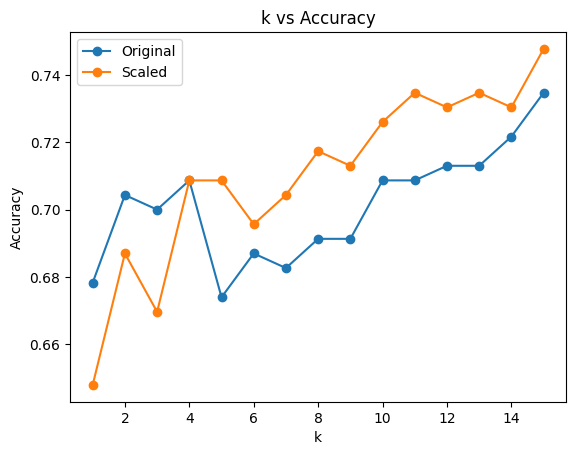

In [21]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(k_values, acc_original_list, marker='o', label='Original')
plt.plot(k_values, acc_scaled_list, marker='o', label='Scaled')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.legend()
plt.show()


3.

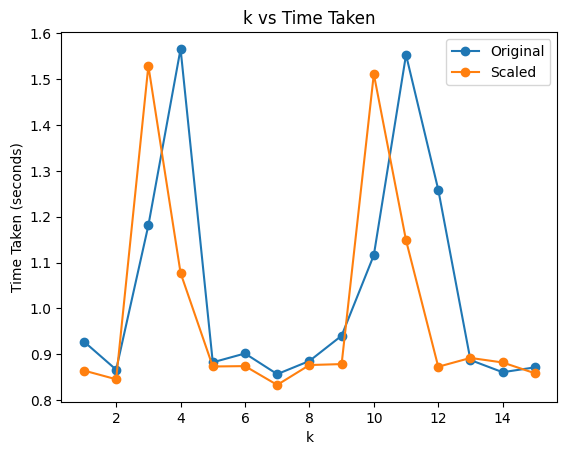

In [22]:
plt.figure()
plt.plot(k_values, time_original, marker='o', label='Original')
plt.plot(k_values, time_scaled, marker='o', label='Scaled')
plt.xlabel('k')
plt.ylabel('Time Taken (seconds)')
plt.title('k vs Time Taken')
plt.legend()
plt.show()
